# NumPy Tutorial
[Source](https://github.com/PoLun-Wang/Learn_NumPy)

# Note 1: The padding on matrix
* 如果你有恆心、毅力僅使用Numpy打造自己的卷積神經網路(CNN)就一定會碰到一個問題，CNN裡面會用到的Padding該怎麼實作？其實Numpy已經幫你準備好這項功能(當然這個功能應該不僅止於此)。總之，本文就是來教該如何使用`numpy.pad()`。

In [1]:
import numpy as np

## 語法
* **Padded_array=`np.pad`(array=`欲加入padding的矩陣`, pad_width=`矩陣的哪些維度加入padding`, mode=`填充值的模式`, constant_values=`填充固定數值`)** :這就是用來加入padding的函數，其中特別需要注意的是constant_value，這是當 mode=’constant’ 的時候用來搭配使用的設定，用途就是填充『固定值』的用法，而填充固定值正是`卷積神經網路的Padding會使用到的功能`。

* 然而，填充數值的方式還有很多種，建議各位可以先學會固定值模式，也有益於再去學習別種填充模式。

## 基礎-2維矩陣(無Channel)
* 我們使用一個 (3, 3) 的2維矩陣，在它的四周加入數值為0，大小=1的padding。
* 此例子需要填充固定值，所以這兩個設定基本上是不變的：mode=’constant’、constant_values=0

* 對於初次學習numpy.pad的人來說，學習重點將會在於`pad_width`的設定，也因此本文將會針對這個屬性設定的用法加以說明。
* 此範例有**2個維度**，所以`pad_width`要有**兩個維度的設定值**，所以我們先建立一個**2維度的tuple：( ( ), ( ) )**。這個tuple內的數值設定有個原則，就是**每個維度**都要分別設定**起始邊緣**與**結束邊緣**需要填充元素的數量。
* 依據此例子的需求，我們需要設定padding=1，就是起始與結束邊緣都填充1個元素，因此 pad_width=((1,1),(1,1))。

In [2]:
a_2d = np.arange(1,10).reshape(3,3)
print("(Original) 2d feature map=>\n{0}\n".format(a_2d))

a_2d = np.pad(array=a_2d, pad_width=((1,1),(1,1)), mode='constant', constant_values=0)
print("(Padding)  2d feature map=>\n{0}".format(a_2d))

(Original) 2d feature map=>
[[1 2 3]
 [4 5 6]
 [7 8 9]]

(Padding)  2d feature map=>
[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]]


## 中階-3維矩陣(Channel first)
**Channel是啥？**

* Channel指的是圖片內的三原色(RGB)通道，假設一張(5×5)的彩色圖片就會有3色通道，所以把這張圖片讀入python並轉成array，就會獲得一個(5×5×3)的矩陣，其中3就是channel。

**那Channel first的意思？**

* 指的是讀入Python的圖片矩陣的三原色通道是在第一個維度還是在最後的維度？以上述例子來說，(5×5×3)的矩陣就是Channel last，然而(3×5×5)的矩陣就代表了Channel first，另外值得一提的是**`圖片通常都是Channel last`**，但是如果直接將圖片矩陣以數值的形式print出來，則以Channel first比較易懂。

**Channel = 1**
* 你可能會覺得 1 個Channel的3×3圖片跟前一個例子有什麼差別？
* 差異可大了，因為多一個維度——Channel。
* 首先，我們要認清一點，**Channel這個維度是不需要 padding**，我們僅需要在『內容』的部分加入 padding，也就是在3×3的像素邊緣加入 padding 就好。所以，**`pad_width` 就需要在 Channel 的維度給予 (0,0) 的設定值囉**。按照維度依序排列 `pad_width=( (0,0), (1,1), (1,1) )`，簡單吧！

In [3]:
a_3d = np.arange(1,10).reshape(1,3,3)
print("(Original) 3d feature map=>\n{0}\n".format(a_3d))

a_3d = np.pad(array=a_3d, pad_width=((0,0),(1,1),(1,1)), mode='constant', constant_values=0)
print("(Padding)  3d feature map=>\n{0}".format(a_3d))

(Original) 3d feature map=>
[[[1 2 3]
  [4 5 6]
  [7 8 9]]]

(Padding)  3d feature map=>
[[[0 0 0 0 0]
  [0 1 2 3 0]
  [0 4 5 6 0]
  [0 7 8 9 0]
  [0 0 0 0 0]]]


**Channel = 3**
* 本範例是 1 個 3-Channel 的範例，設定也跟上述一樣，因為只要**僅有 1 張照片，要幾個 Channel 的設定都一樣並不會增加維度**。
* 所以，`pad_width=( (0,0), (1,1), (1,1) )`，跟上一個例子一樣。

In [4]:
a_3d = np.arange(1,28).reshape(3,3,3)
print("(Original) 3d feature map=>\n{0}\n".format(a_3d))

a_3d = np.pad(array=a_3d, pad_width=((0,0),(1,1),(1,1)), mode='constant', constant_values=0)
print("(Padding)  3d feature map=>\n{0}".format(a_3d))

(Original) 3d feature map=>
[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]
  [25 26 27]]]

(Padding)  3d feature map=>
[[[ 0  0  0  0  0]
  [ 0  1  2  3  0]
  [ 0  4  5  6  0]
  [ 0  7  8  9  0]
  [ 0  0  0  0  0]]

 [[ 0  0  0  0  0]
  [ 0 10 11 12  0]
  [ 0 13 14 15  0]
  [ 0 16 17 18  0]
  [ 0  0  0  0  0]]

 [[ 0  0  0  0  0]
  [ 0 19 20 21  0]
  [ 0 22 23 24  0]
  [ 0 25 26 27  0]
  [ 0  0  0  0  0]]]


**多張Channel = 3的照片(4維矩陣)**
* 是的，多張照片的情況下，肯定會多 1 個維度，但是**`pad_width`的設定原則很簡單，僅需在圖片像素的維度加入填充像素即可**。因此，`pad_width=( (0,0), (0,0), (1,1), (1,1) )`

In [5]:
multi_a_3d = np.arange(1,55).reshape(2,3,3,3)
print("(Original) 3d feature map=>\n{0}\n".format(multi_a_3d))

multi_a_3d = np.pad(array=multi_a_3d, pad_width=((0,0),(0,0),(1,1),(1,1)), mode='constant', constant_values=0)
print("(Padding)  3d feature map=>\n{0}".format(multi_a_3d))

(Original) 3d feature map=>
[[[[ 1  2  3]
   [ 4  5  6]
   [ 7  8  9]]

  [[10 11 12]
   [13 14 15]
   [16 17 18]]

  [[19 20 21]
   [22 23 24]
   [25 26 27]]]


 [[[28 29 30]
   [31 32 33]
   [34 35 36]]

  [[37 38 39]
   [40 41 42]
   [43 44 45]]

  [[46 47 48]
   [49 50 51]
   [52 53 54]]]]

(Padding)  3d feature map=>
[[[[ 0  0  0  0  0]
   [ 0  1  2  3  0]
   [ 0  4  5  6  0]
   [ 0  7  8  9  0]
   [ 0  0  0  0  0]]

  [[ 0  0  0  0  0]
   [ 0 10 11 12  0]
   [ 0 13 14 15  0]
   [ 0 16 17 18  0]
   [ 0  0  0  0  0]]

  [[ 0  0  0  0  0]
   [ 0 19 20 21  0]
   [ 0 22 23 24  0]
   [ 0 25 26 27  0]
   [ 0  0  0  0  0]]]


 [[[ 0  0  0  0  0]
   [ 0 28 29 30  0]
   [ 0 31 32 33  0]
   [ 0 34 35 36  0]
   [ 0  0  0  0  0]]

  [[ 0  0  0  0  0]
   [ 0 37 38 39  0]
   [ 0 40 41 42  0]
   [ 0 43 44 45  0]
   [ 0  0  0  0  0]]

  [[ 0  0  0  0  0]
   [ 0 46 47 48  0]
   [ 0 49 50 51  0]
   [ 0 52 53 54  0]
   [ 0  0  0  0  0]]]]


## 高階-3維矩陣(Channel last)
**Channel last為什麼是高階？**
* 因為真的沒辦法直接 print 就能看出你的 padding 結果正確與否，但也不排除是我太廢的緣故 😀

* 我會在此例子直接把 (3×3×3) 的小圖顯示出來，作為padding正確與否的確認方式。我先設計了一張原始圖，原圖的中間都是白色的。最後在這個小圖的周圍填充 0 的邊緣，這個邊緣畫出來應該是黑色，因為色碼 #000000 為黑色，反之 #FFFFFF 即為白色。

* 然而，我們來分析此例子的矩陣維度配置順序 **`( (圖片張數, 圖高, 圖寬, Channel ) )`**，我們僅需要在圖片真正構成像素的部分進行填充像素即可，所以 pad_width=( (0,0), (1,1), (1,1), (0,0) )。

(Original) 3d feature map=> Shape:(1, 3, 3, 3)
[[[[0.2 0.2 0.2]
   [1.  1.  1. ]
   [0.2 0.2 0.2]]

  [[0.5 0.5 0.5]
   [1.  1.  1. ]
   [0.5 0.5 0.5]]

  [[0.8 0.8 0.8]
   [1.  1.  1. ]
   [0.8 0.8 0.8]]]]
(Padding)  3d feature map=> Shape:(1, 5, 5, 3)
[[[[0.  0.  0. ]
   [0.  0.  0. ]
   [0.  0.  0. ]
   [0.  0.  0. ]
   [0.  0.  0. ]]

  [[0.  0.  0. ]
   [0.2 0.2 0.2]
   [1.  1.  1. ]
   [0.2 0.2 0.2]
   [0.  0.  0. ]]

  [[0.  0.  0. ]
   [0.5 0.5 0.5]
   [1.  1.  1. ]
   [0.5 0.5 0.5]
   [0.  0.  0. ]]

  [[0.  0.  0. ]
   [0.8 0.8 0.8]
   [1.  1.  1. ]
   [0.8 0.8 0.8]
   [0.  0.  0. ]]

  [[0.  0.  0. ]
   [0.  0.  0. ]
   [0.  0.  0. ]
   [0.  0.  0. ]
   [0.  0.  0. ]]]]


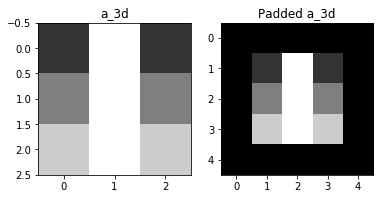

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

a_3d = np.array([[ [[0.2,0.2,0.2],[  1,  1,  1],[0.2,0.2,0.2]],
                   [[0.5,0.5,0.5],[  1,  1,  1],[0.5,0.5,0.5]],
                   [[0.8,0.8,0.8],[  1,  1,  1],[0.8,0.8,0.8]]]])
print("(Original) 3d feature map=> Shape:{0}".format(a_3d.shape))
print(a_3d)

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('a_3d')
axarr[0].imshow(a_3d[0,:,:,:])

a_3d = np.pad(array=a_3d, pad_width=((0,0),(1,1),(1,1),(0,0)), mode='constant', constant_values=0)
print("(Padding)  3d feature map=> Shape:{0}".format(a_3d.shape))
print(a_3d)

axarr[1].set_title('Padded a_3d')
axarr[1].imshow(a_3d[0,:,:,:])

(Original) 3d feature map=> Shape:(1, 3, 3, 3)
[[[[0.2 0.2 0.2]
   [1.  1.  1. ]
   [0.2 0.2 0.2]]

  [[0.5 0.5 0.5]
   [1.  1.  1. ]
   [0.5 0.5 0.5]]

  [[0.8 0.8 0.9]
   [1.  1.  1. ]
   [0.9 0.8 0.8]]]]
(Padding)  3d feature map=> Shape:(1, 5, 5, 3)
[[[[0.  0.  0. ]
   [0.  0.  0. ]
   [0.  0.  0. ]
   [0.  0.  0. ]
   [0.  0.  0. ]]

  [[0.  0.  0. ]
   [0.2 0.2 0.2]
   [1.  1.  1. ]
   [0.2 0.2 0.2]
   [0.  0.  0. ]]

  [[0.  0.  0. ]
   [0.5 0.5 0.5]
   [1.  1.  1. ]
   [0.5 0.5 0.5]
   [0.  0.  0. ]]

  [[0.  0.  0. ]
   [0.8 0.8 0.9]
   [1.  1.  1. ]
   [0.9 0.8 0.8]
   [0.  0.  0. ]]

  [[0.  0.  0. ]
   [0.  0.  0. ]
   [0.  0.  0. ]
   [0.  0.  0. ]
   [0.  0.  0. ]]]]


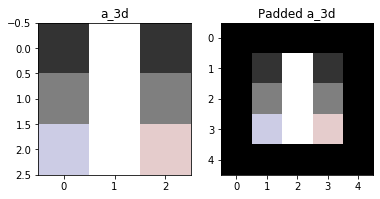

In [18]:
a_3d = np.array([[ [[0.2,0.2,0.2],[  1,  1,  1],[0.2,0.2,0.2]],
                   [[0.5,0.5,0.5],[  1,  1,  1],[0.5,0.5,0.5]],
                   [[0.8,0.8,0.9],[  1,  1,  1],[0.9,0.8,0.8]]]])
print("(Original) 3d feature map=> Shape:{0}".format(a_3d.shape))
print(a_3d)

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('a_3d')
axarr[0].imshow(a_3d[0,:,:,:])

a_3d = np.pad(array=a_3d, pad_width=((0,0),(1,1),(1,1),(0,0)), mode='constant', constant_values=0)
print("(Padding)  3d feature map=> Shape:{0}".format(a_3d.shape))
print(a_3d)

axarr[1].set_title('Padded a_3d')
axarr[1].imshow(a_3d[0,:,:,:])

## Reference
[numpy.pad – SciPy.org](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html)